
![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/6b82384c-38cc-903b-1f62-9a34110f3475.png)

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/8915e2a3-8b01-1600-a941-0fed38c350d2.png)

$\ $ セミナーで使用するモデルはすてべ学習目的ですので注意してください。  
$\ $  
$\ $  
$\ $  
$\ $  
$\ $  
$\ $  
$\ $  
$\ $  
$\ $  
$\ $  
$\ $  
$\ $  
$\ $  
$\ $  
$\ $  
$\ $  


# ブラック‐ショールズモデル
確率変数を用いて、オプションという金融資産のもつ将来のキャッシュフローの期待値を計算します。
モデルの導出に関して必要となる理想的な状態を仮定します。

r:短期金利は既知で満期までの期間一定である。

s:原資産の価格は連続時間のランダムウォークにしたがう。その際の分散は価格の二乗に比例する。そのために有限時間内の株価の分布は対数正規分布となる。配当はない。

σ: 原資産のリターンの分散は一定である。

k: 行使価格。オプションはヨーロピアンで満期でのみ行使可能である。

オプションと原資産の売買には費用が掛からない。

どのような金額でも、期間でも短期金利で借入、貸出ができる。

空売りに制限はない。

## 一般化されたブラック-ショールズモデル
ブラック‐ショールズモデルと同様の方法で配当付株式オプション、先物オプションもモデル化できます。

$C(s,k,σ,r,b,T)=se^{((b-r)T)} N(d_1)-ke^{(-rT)} N(d_2)$　　　---------------------- (1)

$P(s,k,σ,r,b,T)=ke^{(-rT)} N(-d_2)-e^{((b-r)T)} sN(-d_1)$

$N(z)=\frac{1}{\sqrt{2\pi}} \int_{-\infty}^z e^{(-y^2/2)} dy$
 


$N(d)=\frac{1}{2\pi}\int_{-\infty}^{d}e^{-\frac{z^2}{2}}$

$d_1=\frac{\log\frac{S}{K}+(b+\sigma^2/2)(T)}{\sigma\sqrt{T}}$

$d_2=\frac{\log\frac{S}{K}+(b-\sigma^2/2)(T)}{\sigma\sqrt{T}}$

---	
- スポット価格	s
- 行使価格	k
- ボラティリティ	σまたはv
- 資金調達費用	r
- 配当、外国金利等	q
- キャリーコスト	b=r-q
- 満期・行使日までの期間	T
--- 
- b=r	ブラック株価オプション
- b=r-q	連続配当付き株価オプション
- b=0	先物オプション
- b=0,r=0	マージン先物オプション
- b=r-r_f	通貨オプション


# モンテカルロ法

モンテカルロ法では確率分布から確率変数を生成して、それを原資産価格の動きと見立てていきます。生成する乱数の数が精度と計算時間を支配します。

基本的な流れは 

- 統計モデルを作成する 
- 乱数を発生させる 
- 生成した乱数をモデルに代入し、モデルによる値を算出する

必要に応じて1,2,3を繰り返す。結果を平均して期待値とみなす。

$g(x)$を任意の関数、$f(x)$を確率密度関数とすると、
その期待値は

$E[g(x)]=\int_a^b g(x)f(x)dx=\mu$

分散は

$V[g(x)]=E[(g(x)-\mu)^2 ]=\int_a^b(g(x)-μ)^2 f(x)dx=\sigma^2$

で表されます。ここで$\int_a^bf(x)dx=1$。$a$と$b$は積分の範囲を示しています。$n$個の標本$x_i$を$f(x)$から生成して、母集団の平均$\mu$と分散$\sigma^2$を推定します。標本平均

$\bar{g}=1/n \sum_{i=1}^ng(x_i)$ 

についてつぎの性質が成り立ちます。

$E[\bar{g}]=E(1/n \sum_{i=1}^n g(x_i))=1/n \sum_{i=1}^n E[g(x_i)]=1/n \sum_{i=1}^n\mu=\mu$

$V[\bar{g}]=V\left(1/n \sum_{i=1}^ng(x_i)\right)=(1/n)^2 \sum_{i=1}^n V[ g(x_i)]=(1/n)^2 \sum_{i=1}^n\sigma^2=\sigma^2/n$


$z=\frac{(\bar{g}-\mu)}{\sqrt{\sigma^2/n}}$の分布は標準正規分布にしたがいます。95％の信頼区間は

$\bar{g}-1.96 \sigma/\sqrt{n}≤\mu≤\bar{g}+1.96 \sigma/\sqrt{n}$

となります。ここで、$P(|z|≤1.96│\mu)=0.95$です。

　また、母分散の不偏推定量は

$\hat{σ}^2=1/(n-1)\sum_{i=1}^n[g(x_i )-\bar{g}]^2$

であるので、分散の95％の信頼区間は

$\frac{((n-1)\hat{σ}^2)}{(\chi_{0.975}^2 (n-1))}≤\sigma^2≤\frac{((n-1)\sigma^2)}{(\chi_{0.025}^2 (n-1))}$

となります。ここで、$\chi_{0.975}^2(n-1),\chi_{0.025}^2 (n-1)$は$\chi$二乗分布の下側および上側2.5%点です。


## 乱数の種類

### 物理乱数
物理乱数は本質的にランダムな自然現象を利用する方法で、熱雑音とか原子核分裂などが用いられます。生成された乱数列には周期や再現性がない等、メリットがあります。一方で、専用のハードウェアや回路などの特別な生成器が必要となります。


### 疑似乱数
漸化式にもとづき乱数を発生させる方法で、コンピューターにより生成できます。再現性や周期、乱数としての性質が不明確なため、使用には注意が必要です。一様性、独立性、高次元での緻密性が求められます。線形合同法とか乗算合同法といった古典的な疑似乱数生成法から非常に長い周期と高次元での緻密性からメルセンヌツイスターが用いられてきました。しかし、最近では統計的評価、計算速度、メモリー占有率、予測不可能性、再現性に優れたPCG系列の乱数も注目されています。


![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/3bf14e2d-d4bd-2b36-93d4-a1aec93b2b29.png)
出所：https://www.pcg-random.org/index.html

## 乱数の精度の改良

生成された乱数の平均と分散は目的とするものになるとは限りません。
そこで、いくつかの改良法を紹介します。

- 対称変量法：乱数部分のセルを2つに分け、一方にマイナスをかけたセルをもう一方にコピーします。
- モーメント照合法：平均と標準偏差を用いて調整します。
- 重点サンプリング：重要なデータの重みを大きくしてサンプリングして、その影響を後で調整します。
- MCMC(マルコフ連鎖モンテカルロ法)：確率分布のサンプリングを行うアルゴリズムの総称です。

これらについては、時系列データの項で詳しく扱います。

母数と統計量の関係は普遍です。

$\bar{g}-1.96\sigma/\sqrt{n}≤\mu≤\bar{g}+1.96\sigma/\sqrt{n}$

$\frac{((n-1)\sigma^2)}{(\chi_0.975^2 (n-1))}≤\sigma^2≤\frac{((n-1)\sigma^2)}{(\chi_0.025^2 (n-1))}$



# 時系列データの生成

　金融の世界では、金融資産の価値の評価、リスク管理、トレーディング戦略の収益性の確認などにモンテカルロ法が活用されています。
そこでは、価格の動きを幾何ブラウン運動として表現することがしばばしばです。オプションの評価に用いられるモンテカルロ法はこの例です。そこでまず幾何ブラウン運動を再現し、その問題点を探ってみたいとおもいます。その動きは

$\mathrm{d}S_t=\mu S_t \mathrm{d}t+\sigma \sqrt{\mathrm{d}t} S_t\mathrm{d}W_t$　(2)

の確率微分方程式(SDE)を解くことで得られます。$S_t$は$t$時点の株価です。$\sigma$は価格変動の程度を、$\mu$は株価のトレンドをあらわす定数です。$W_t$は標準ウィナー過程です。$\mathrm{d}W_t$は標準正規分布にしたがいます。
$\mu$も$\sigma$も株価がもつ特有の特性で、過去の価格データから推定されます。このSDEを解くと

$S_{t}=S_{t-1}\exp[(\mu-0.5\sigma^2)\mathrm{d}t+\sigma \sqrt{\mathrm{d}t} \mathrm{d} W_t]$　　(2)`

が得られます。
　$S_t$の幾何ブラウン運動は

期待値　$\exp(\mu t)S_0$、
分散　　$\exp(2\mu t)S_0^2(\exp(\sigma^2t)-1)$

で連続的に動く確率過程です。これは$S_{t}=S_{0}\exp[(\mu-0.5\sigma^2)t+\sigma \sqrt{t} W_t]$とすれば見通しが良くなります。

また、対数価格の差$\ln S_t-\ln S_0$は

期待値　$(\mu  - 1/2 \sigma^2) t$、
分散　　$\sigma^2t$

となります。

　モンテカルロシミュレーションを用いて、時系列データを作ってみましょう。genSという関数で株価を再現します。コードの重要な部分は、 

```Python
    sigma = np.array([sigma0])
    dt = 1/DAYS
```
sigma0は金融市場でボラティリティと呼ばれるもので、日々の対数価格差の標準偏差を求めてそれを年率換算したものです。したがって、年率の標準偏差を日次の標準偏差に変換する必要があります。その調整にdt=1/DAYSを用います。

```Python
S = np.array([[0.0 for i in range(nDays+1)] for j in range(nSim)])
```
配列$S$を初期化しています。このような配列の作成を内包表記といいます。配列を短時間で作れます。

```Python
w=rng.standard_normal( size=(1,nDays)).T
```
は乱数を発生しています。これは(2)式の$\mathrm{d}W_t$に相当します。また、
```Python
x = np.exp((mu - 0.5*sigma ** 2) * dt + w*np.sqrt(dt)*sigma)
```
は(2)'式そのものです。ここで目的とする平均と分散の条件にしたがう時系列データを生成しています。np.sqrt(dt)×sigmaは年率の標準偏差を日次に変換しています。

```Python
x = np.vstack([np.ones(len(sigma)), x])
```
これは各時系列の初期値を１に設定しています。
```Python
x = x.cumprod(axis=0)
```
累積計算により、価格の時系列を生成します。

Pythonを初期化します。

In [16]:
import numpy as np
from numpy.random import default_rng, Generator, PCG64, MT19937
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
from scipy import stats
from datetime import datetime, date,time
import pandas as pd
DAYS=240

In [17]:
def genS(mu,sigma0,nDays,nSim):
    #np.random.seed(1)
    sigma = np.array([sigma0])
    dt = 1/DAYS
    S = np.array([[0.0 for i in range(nDays+1)] for j in range(nSim)])
    rng = np.random.default_rng()
    for j in range(nSim):
        w=rng.standard_normal( size=(1,nDays)).T
        x = np.exp((mu - 0.5*sigma ** 2) * dt + w*np.sqrt(dt)*sigma)
        x = np.vstack([np.ones(len(sigma)), x])
        x = x.cumprod(axis=0)
        S[j][:]=x.ravel()
    return S

ボラティリティが４０％で価格の年率の上昇率が１０％の時系列を作ってみましょう。満期は1年とし、一年間の価格の生成を１試行として、百万回作ってみたいと思います。


In [18]:
t1=datetime.now()
vol=0.4 #0.65
mu=0.1#0.004
nDays=DAYS*1#1 year maturity
nSim=10000
S=genS(mu,vol,nDays,nSim)
print(datetime.now()-t1)

0:00:00.523914


できたものを頻度図として表示します。

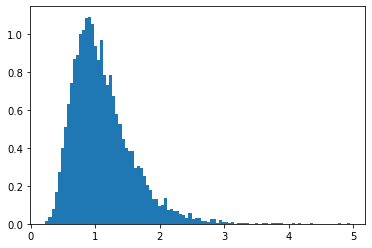

In [19]:
fig, ax = plt.subplots(1, 1)
ax.hist(S[:,nDays],bins=100,density=True)
plt.show()

右にすそ野の長い分布が見て取れます。実際に生成した価格の時系列の分布を幾何ブラウン運動にしたがう確率変数の確率密度関数として見てみましょう。

$f(s,\mu,\sigma,t)=\frac{1}{\sqrt{2\pi}}\frac{1}{s\sigma\sqrt{t}}\exp (-\frac{([\ln(s)-\ln(S_0)-(\mu-0.5\sigma^2)t]^2}{2\sigma^2t})$  ---(3)

In [20]:
def lognormal(x,mu,vol,t):
    tmp=1/np.sqrt(2*np.pi*t)/vol/x
    return tmp*np.exp(-(np.log(x)-(mu-0.5*vol**2)*t)**2/2/vol**2/t)

この関数を利用してヒストグラムに当てはめてみます。また、

```Python
s,l,sc= stats.lognorm.fit
```
を用いて対数正規分布と生成データの間の当てはまりの具合を確認します。sはshape パラメータ、lはlocパラメータ、scはscaleパラメータです。

```Python
lognorm.pdf(x, s,l,sc)
```
はデータｘのパラメータs,loc,scで指定された対数正規分布の確率密度を計算します。

```Python
lognormal(x,mu,vol,nDays/DAYS)
```
は式(3)の確率密度を算出します。

```Python
stats.probplot(S[:,nDays], dist="lognorm", sparams=(s,l,sc),plot=plt)
```
確率プロット分析を提供します。distで対数正規分布で指定し、sparams=(s,l,cs)で関連するパラメータを指定しています。理論確率(赤の直線)と実際の確率(青のドット)を比べています。

shape,loc,scale 0.3982134633495497 -0.013127420281404385 1.0362008674557923


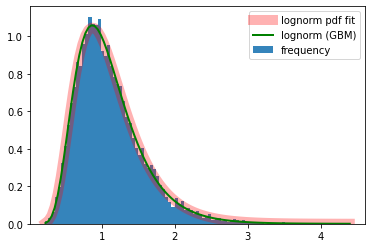

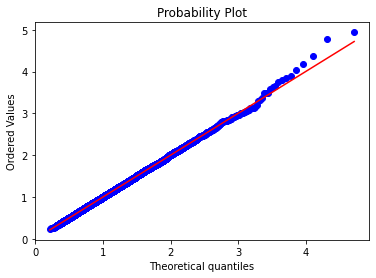

In [21]:
s,l,sc = stats.lognorm.fit(S[:,nDays])
print('shape,loc,scale',s,l,sc)
fig, ax = plt.subplots(1, 1)
x = np.linspace(lognorm.ppf((1/nSim), s),
                lognorm.ppf((1-1/nSim), s), 100)
ax.hist(S[:,nDays],bins=x,alpha=0.9,density=True,label='frequency')
ax.plot(x, lognorm.pdf(x, s,l,sc),
       'r-', lw=10, alpha=0.3, label='lognorm pdf fit')
ax.plot(x, lognormal(x,mu,vol,nDays/DAYS),
       'g-', lw=2, alpha=1, label='lognorm (GBM)')
plt.legend()
plt.show()
stats.probplot(S[:,nDays], dist="lognorm", sparams=(s,l,sc),plot=plt)
plt.show()

Scipyではp-pプロットを用いています。見た感じでは大きく上昇した場面で、ノイズが大きそうです。この点について確認をします。

$f(s,\mu,\sigma,t)=\frac{1}{\sqrt{2\pi}}\frac{1}{s\sigma\sqrt{t}}\exp (-\frac{([\ln(s)-\ln(S_0)-(\mu-0.5\sigma^2)t]^2}{2\sigma^2t})$

の分布ですが、これは平均 $(\mu-0.5\sigma^2)t$、分散 $\sigma^2 t$の価格の対数が正規分布にしたがうのと同等です。確かめてみましょう。

In [22]:
stats.norm.pdf(0,(mu-0.5*vol**2),vol),lognormal(1,mu,vol,1)

(0.9961097852369101, 0.9961097852369101)

２つの値がほぼ同じであることから、対数正規分布にしたがう確率変数は、平均 $(\mu-0.5\sigma^2)t$、分散 $\sigma^2 t$の確率変数の対数が正規分布にしたがうのと同じと確認できます。


この関数を利用してヒストグラムに当てはめてみます。また、stats.norm.fitを用いて当てはまりの具合を確認します。価格を対数正規分布で分析するよりも、対数価格を正規分布で分析した方が、価格の上昇、下落が対称になり、見た感じで理解しやすくなります。

shape,loc 0.021738914416175172 0.40377581360516246


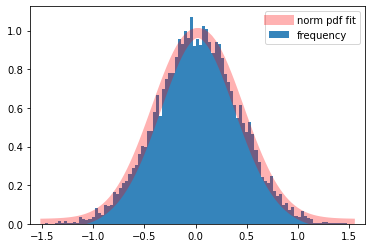

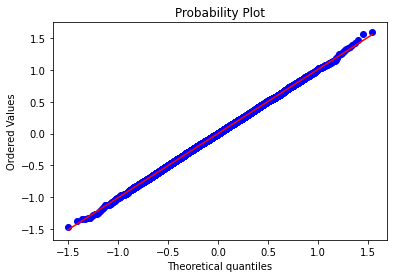

In [23]:
def MCsim(S,nDays,nSim):
    s,l = stats.norm.fit(np.log(S[:,nDays]))
    print('shape,loc',s,l)
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(norm.ppf(1/nSim,(mu-0.5*vol**2)*nDays/DAYS,vol*np.sqrt(nDays/DAYS)),
                    norm.ppf(1-1/nSim,(mu-0.5*vol**2)*nDays/DAYS,vol*np.sqrt(nDays/DAYS)), 100)
    ax.hist(np.log(S[:,nDays]),bins=x,alpha=0.9,density=True,label='frequency')
    ax.plot(x, norm.pdf(x, s,l),
           'r-', lw=10, alpha=0.3, label='norm pdf fit')
    #ax.plot(x, lognormal(x,mu,vol,nDays/DAYS),
    #       'g-', lw=2, alpha=1, label='lognorm (GBM)')
    plt.legend()
    plt.show()
    stats.probplot(np.log(S[:,nDays]), dist="norm", sparams=((mu-0.5*vol**2)*nDays/DAYS,vol*np.sqrt(nDays/DAYS)),plot=plt)
    plt.show()
MCsim(S,nDays,nSim)


とりあえず、生成した時系列の特性の確認が取れました。

つぎに

- 対称変量法：乱数部分のセルを2つに分け、一方にマイナスをかけたセルをもう一方にコピーします。
- モーメント照合法：平均と標準偏差を用いて調整します。
- 重点サンプリング：重要なデータの重みを大きくしてサンプリングして、その影響を後で調整します。
- MCMC(マルコフ連鎖モンテカルロ法)：確率分布のサンプリングを行うアルゴリズムの総称です。

について、どのような効果があるか、ヨーロピアンコールの価値を評価することで確かめてみましょう。ヨーロピアンオプションの評価には満期の価格のみが必要なので、満期の価格を得ます。

```Python
S[:5,-1]
```
は最初の5つの満期のデータを表示します。"-1"は最後尾のデータを取得します。

In [24]:
S[:5,-1]

array([0.57363658, 1.19614651, 0.80730648, 0.72442892, 1.17894007])

つぎに行使価格1のヨーロピアンコールオプションの価値を先ほど生成したSを用いて、算出します。また、Sのリターンとボラティリティを算出します。

In [25]:
k=1
print('european call option value',np.average([max([i,0]) for i in (S[:,-1]-k).ravel()])*np.exp(-mu))
print('historical return', np.average(S[:,-1]/S[:,0]), 'mu',mu)
print('historical vol', np.std(np.diff(np.log(S)))*np.sqrt(DAYS), 'implied vol',vol)

european call option value 0.20625517004978267
historical return 1.1086145018108717 mu 0.1
historical vol 0.3997038641884501 implied vol 0.4


つぎに一般化BS型のヨーロピアンオプションの価値を算出します。式(1)を用います。

In [26]:
def gbscall(s,k,t,r,q,v):
    b=r-q
    d1=(np.log(s/k)+(b+v**2/2)*t)/v/np.sqrt(t)
    d2=(np.log(s/k)+(b-v**2/2)*t)/v/np.sqrt(t)
    return np.exp((b-r)*t)*s*norm.cdf(d1)-k*np.exp(-r*t)*norm.cdf(d2)
print('european BS call value', gbscall(1,k,1,mu,0,vol))

european BS call value 0.203184693100587


ほぼ同じ値となりました。

### 目的とする確率変数の精度と効率性の向上

つぎのアルゴリズムの評価を行います。

- 対称変量法：乱数部分のセルを2つに分け、一方にマイナスをかけたセルをもう一方にコピーします。
- モーメント照合法：平均と標準偏差を用いて調整します。
- 重点サンプリング：重要なデータの重みを大きくしてサンプリングして、その影響を後で調整します。
- MCMC(マルコフ連鎖モンテカルロ法)：確率分布のサンプリングを行うアルゴリズムの総称です。

乱数を調整する効果を見たいので、試行回数をnSim=1000としてみます。また便宜上、mu=0とします。またオプションをアット・ザ・マネーとし、行使価格を1としています。

In [27]:
t1=datetime.now()
nSim=1000
mu=0.0
S=genS(mu,vol,nDays,nSim)
k=1
print('european call option value',np.average([max([i,0]) for i in (S[:,-1]-k).ravel()])*np.exp(-mu))
print('european BS call value', gbscall(1,k,1,mu,0,vol))
print('historical return', np.average(S[:,-1]/S[:,0])-1, ', mu',mu)
print('historical vol', np.std(np.diff(np.log(S)))*np.sqrt(DAYS), ', implied vol',vol)
print(datetime.now()-t1)

european call option value 0.14359454827590457
european BS call value 0.15851941887820603
historical return -0.009974267036834461 , mu 0.0
historical vol 0.40044963778710846 , implied vol 0.4
0:00:00.097491


試行回数を減らすと誤差が大きくなるのが分かります。
対称変量法とモーメント照合法を試すために、プログラムのコードを少し書き換え、オリジナルの乱数を残します。

```Python
w1=rng.standard_normal( size=(1,nDays*nSim)).T
```
配列を1次元にして、乱数の調整をしやすくします。

```Python
w2=w1.reshape(1000,240)
```
1次元の配列を2次元の配列に変更します。

In [28]:
rng = np.random.default_rng()
sigma0=vol
sigma = np.array([sigma0])
w1=rng.standard_normal( size=(1,nDays*nSim)).T
w2=w1.reshape(1000,240)
S1 = np.array([[0.0 for i in range(nDays+1)] for j in range(nSim)])
j=0
dt=1/DAYS
for i in w2:
    w3=np.array([i]).T
    x = np.exp((mu - 0.5*sigma ** 2) * dt + w3*np.sqrt(dt)*sigma)
    x = np.vstack([np.ones(len(sigma)), x])
    x = x.cumprod(axis=0)
    S1[j][:]=x.ravel()
    j+=1
print('historical return', np.average(S1[:,-1]/S1[:,0])-1, ', mu',mu)
print('historical vol', np.std(np.diff(np.log(S1)))*np.sqrt(DAYS), ', implied vol',vol)
print('european call option value',np.average([max([i,0]) for i in (S1[:,-1]-k).ravel()])*np.exp(-mu))
print('european BS call value', gbscall(1,k,1,mu,0,vol))

historical return 0.007135215603088385 , mu 0.0
historical vol 0.40045456947714453 , implied vol 0.4
european call option value 0.16350287225065357
european BS call value 0.15851941887820603


#### 対称変量法
つぎに対称変量法を試します。

```Python
w9=w1[:120000]
w9=np.vstack([w9,-w9])
```
1次元の配列w1を半分に分割し、その正負を逆転して足し合わせ、w9とします。

In [29]:
w9=w1[:120000]
w9=np.vstack([w9,-w9])
w2=w9.reshape(1000,240)
print(np.shape(w2))
S1 = np.array([[0.0 for i in range(nDays+1)] for j in range(nSim)])
j=0
dt=1/DAYS
for i in w2:
    w3=np.array([i]).T
    x = np.exp((mu - 0.5*sigma ** 2) * dt + w3*np.sqrt(dt)*sigma)
    x = np.vstack([np.ones(len(sigma)), x])
    x = x.cumprod(axis=0)
    S1[j][:]=x.ravel()
    j+=1
print('historical return', np.average(S1[:,-1]/S1[:,0])-1, ', mu',mu)
print('historical vol', np.std(np.diff(np.log(S1)))*np.sqrt(DAYS), ', implied vol',vol)
print('european call option value',np.average([max([i,0]) for i in (S1[:,-1]-k).ravel()])*np.exp(-mu))
print('european BS call value', gbscall(1,k,1,mu,0,vol))

(1000, 240)
historical return 0.0016424260513874245 , mu 0.0
historical vol 0.4003918070381275 , implied vol 0.4
european call option value 0.1587358166022564
european BS call value 0.15851941887820603


#### モーメント照合法

つぎにモーメント照合法を試します。

```Python
m=np.average(w1)
v=np.std(w1)
w2=(w1-m)/v
```
乱数の平均と標準偏差を計算して、平均ゼロ、標準偏差１の正規乱数に変換します。


In [30]:
m=np.average(w1)
v=np.std(w1)
print('mean of w1', m,' std of w1',v)
w2=(w1-m)/v
m2=np.average(w2)
v2=np.std(w2)
print('mean of w2', m2,' std of w2',v2)

w2=w2.reshape(1000,240)
print(np.shape(w2))
S1 = np.array([[0.0 for i in range(nDays+1)] for j in range(nSim)])
j=0
dt=1/DAYS
for i in w2:
    w3=np.array([i]).T
    x = np.exp((mu - 0.5*sigma ** 2) * dt + w3*np.sqrt(dt)*sigma)
    x = np.vstack([np.ones(len(sigma)), x])
    x = x.cumprod(axis=0)
    S1[j][:]=x.ravel()
    j+=1
print('historical return', np.average(S1[:,-1]/S1[:,0])-1, ', mu',mu)
print('historical vol', np.std(np.diff(np.log(S1)))*np.sqrt(DAYS), ', implied vol',vol)
print('european call option value',np.average([max([i,0]) for i in (S1[:,-1]-k).ravel()])*np.exp(-mu))
print('european BS call value', gbscall(1,k,1,mu,0,vol))

mean of w1 0.0006978359729147137  std of w1 1.0011364236928613
mean of w2 2.424727085781342e-17  std of w2 1.0
(1000, 240)
historical return 0.0026017060819125692 , mu 0.0
historical vol 0.4 , implied vol 0.4
european call option value 0.16075511671007844
european BS call value 0.15851941887820603


調整した乱数の平均はゼロ、標準偏差は１となりました。

しかし、モンテカルロ法によるヨーロピアンオプションの評価に関してはのどちらの方法も必ずしもうまくいくとは限らないことがわかります。


#### 重点サンプリング

重点サンプリングについて学びましょう。まず、モンテカルロ法によるヨーロピアンコールの評価について行使価格を大きくずらして、BSモデルの結果と比べます。

ここでは行使価格を1.1に変更します。


In [31]:
t1=datetime.now()
nSim=1000
mu=0.0
S=genS(mu,vol,nDays,nSim)
k=1.1
print('european call option value',np.average([max([i,0]) for i in (S[:,-1]-k).ravel()])*np.exp(-mu))
print('european BS call value', gbscall(1,k,1,mu,0,vol))
print('historical return', np.average(S[:,-1]/S[:,0])-1, ', mu',mu)
print('historical vol', np.std(np.diff(np.log(S)))*np.sqrt(DAYS), ', implied vol',vol)
print(datetime.now()-t1)

european call option value 0.12246239578554731
european BS call value 0.12108139117843991
historical return -0.0014389364035980456 , mu 0.0
historical vol 0.40128692322899245 , implied vol 0.4
0:00:00.089951


明らかに結果は思わしくありません。モンテカルロ法とBSモデルの解では差が開いています。これはモンテカルロ法では行使価格近辺のパスの数が少なく、発生頻度が下がってしまっているのです。それが原因で、オプションの価値が正確に算出されていないのです。この問題を解消するために、イン・ザ・マネーになるパスのみを発生させ、オプションの価値を算出して、発生確率で調整するという方法をとります。

$k=s\exp\left[(b-\sigma^2/2)T+\sigma\sqrt{T}N^{-1}(w)\right]$

$d=N^{-1}(w)=\frac{\log\frac{k}{s}-(b-\sigma^2/2)(T)}{\sigma\sqrt{T}}$

$w=N\left [\frac{\log\frac{k}{s}-(b-\sigma^2/2)(T)}{\sigma\sqrt{T}} \right]$

すなわち、乱数$w$が$N\left [\frac{\log\frac{K}{S}-(b-\sigma^2/2)(T)}{\sigma\sqrt{T}} \right]$と$1$の間にあれば、コールオプションはイン・ザ・マネーにあります。モンテカルロ法により生成される時系列にこの割合の重み付けをします。イン・ザ・マネーのなるリスク中立確率をかければよいのです。ヨーロピアンコールの場合には$N(d_2)$となります。


$C=N(d_2)\sum \left \{S \exp \left[(b-\sigma^2/2)T+\sigma\sqrt{T}N^{-1}(w_c )\right] \right \}$

ここで$w_c=[1-N(-d)]w+N(d)$です。ここでは逆関数法を用いています。



In [32]:
b=mu
t=1
k=1.1
d=(np.log(k/1)-(b-sigma0**2/2)*t)/sigma0/np.sqrt(t)
d2=(np.log(1/k)+(b-sigma0**2/2)*t)/sigma0/np.sqrt(t)
sigma = np.array([sigma0])
dt = 1
nDays=1
nSim=1000
sum0=0
for i in range(nSim):
    pp=rng.random(1)
    pp=(1-norm.cdf(d))*pp+norm.cdf(d)
    S1=np.exp((b-0.5*sigma0**2)*dt+norm.ppf(pp)*sigma0*np.sqrt(dt))
    sum0+=max([S1-k,0])
print('european call option value',norm.cdf(d2)*(sum0/nSim)*np.exp(-mu))
print('european BS call value', gbscall(1,k,1,mu,0,vol))
d

european call option value [0.11780251]
european BS call value 0.12108139117843991


0.4382754495108124

#### MCMC

- 予備知識

    - 観測値：$x=(x_1,x_2,\dots,x_n)^T$を同時確率密度関数$f(x|\theta)$が定義するパラメトリックモデルから生成されたデータのこと。
    - 事前分布：データ$x$を得る前にもっている$\theta$に関する事前情報を確率分布で表したもので$\pi(x)$で表す。
    - 事後分布：$\pi(\theta|x)$はデータ$x$の情報を得た後の$\theta$に関する条件付分布のこと。
    - 共益事前分布：事前分布と事後分布が同じ確率分布族になること。

$\pi(\theta|x)=\frac{f(x|\theta)\pi(\theta)}{\int_\Theta f(x|\theta)\pi(x)d\theta}$


- 参考：MCMCについて整理してみた。Qiita記事
https://qiita.com/shogiai/items/bab2b915df2b8dd6f6f2

マルコフ連鎖モンテカルロ法は、確率分布のサンプリングを行うアルゴリズムの総称です。代表的なものにメトロポリス・ヘイスティング法とギブス・サンプリング法があります。多くの試行を行ったあとのマルコフ連鎖の状態は、目標とする分布の標本として用いられます。試行の回数が多ければ、その品質も向上します。一般的なモンテカルロ法では、ランダムな標本が独立であることが要求されますが、標本に相関がある場合などには、MCMCが有効です。

- メトロポリス・ヘイスティングアルゴリズム：サンプリングを行いたい確率分布を目標分布、目標分布からのサンプリングを行う確率分布を提案分布といいます。提案分布は、$t$番目に発生させたサンプル$\theta^{(t)}$の値が与えられたときの$t+1$期のサンプル$\theta^{(t+1)}$の値の条件付分布です。提案分布からサンプルの候補を発生させますが、目標分布に依存する採択確率により、サンプルを選択します。

提案分布: $f(y)$  
採択確率: $r=f(y_{new})/f(y)$  


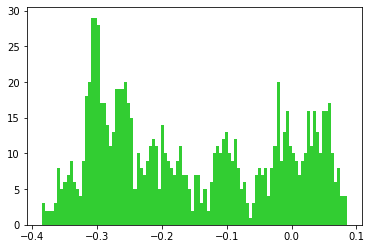

0.01 -0.15440478445228498 0.1348730753007354 1000


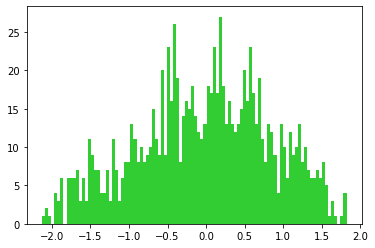

0.25 -0.02894630276660939 0.8665782386489004 1000


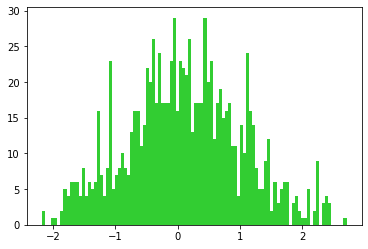

0.5 0.11577322427731482 0.9209105209193771 1000


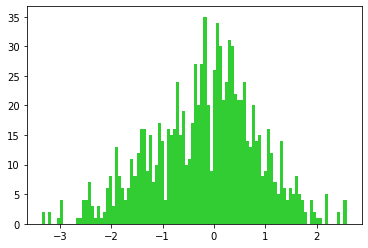

0.75 -0.17475300595729143 1.0330230261435358 1000


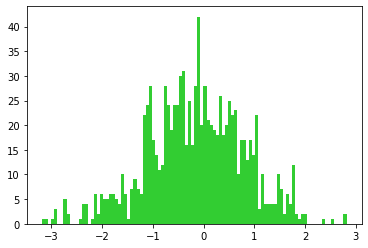

1 -0.16619576123422533 0.9582772762106148 1000


In [33]:
np.random.seed(0)

def f(y):
    return stats.norm.pdf(y,0,1.)

burn_in = 0

for alpha in [0.01,0.25,0.5,0.75,1]:
    res = np.zeros(1000)
    y = 0.    
    for i in range(burn_in+res.shape[0]):
        y_new = alpha*stats.norm.rvs()+y
        r = min(1,f(y_new) / f(y))
        u = np.random.rand()
        if u < r:
            y = y_new
            if i > burn_in:
                res[i-burn_in] = y
        else:
            y = y
            if i > burn_in:
                res[i-burn_in] = y
    plt.hist(res,bins=100,color="limegreen")
    plt.show()
    print(alpha,np.average(res),np.std(res),len(res))

正規分布の場合には、一般的なモンテカルロ法の方がいい結果になることが知られています。

MCMCは、多変量で相関のある分布や混合分布などの場合に威力を発揮します。

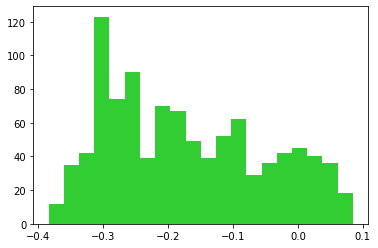

0.01 -0.17230735961939694 0.12090672256169996 1000


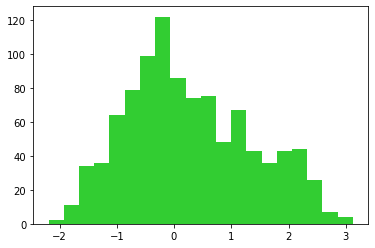

0.25 0.274229240488971 1.0933431740870578 1000


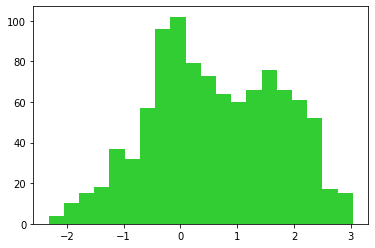

0.5 0.6144559276381802 1.1400673471376621 1000


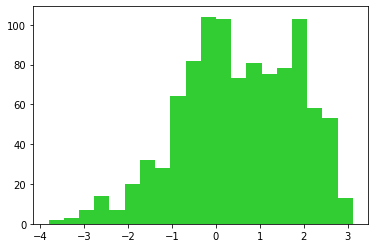

0.75 0.5214428882088844 1.3312608508203918 1000


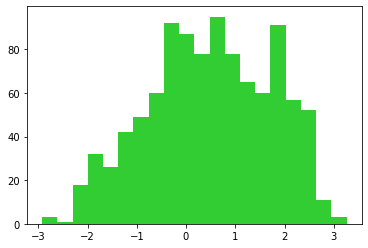

1 0.49458919803509943 1.248719044085955 1000


In [34]:
np.random.seed(0)

def f(y):
    return 0.7*stats.norm.pdf(y,0,1.) + 0.3*stats.norm.pdf(y,2.,0.5)

burn_in = 100

for alpha in [0.01,0.25,0.5,0.75,1]:
    res = np.zeros(1000)
    y = 0.
    for i in range(burn_in+res.shape[0]):
        y_candidate = alpha*stats.norm.rvs()+y
        r = f(y_candidate) / f(y)
        u = np.random.rand()
        if u < r:
            y = y_candidate
            if i > burn_in:
                res[i-burn_in] = y
        else:
            y = y
            if i > burn_in:
                res[i-burn_in] = y
    plt.hist(res,bins=20,color="limegreen")
    plt.show()
    print(alpha,np.average(res),np.std(res),len(res))

# アメリカンオプション

満期より前であればいつでも行使できるオプションは、アメリカンオプションと呼ばれます。アメリカンコールオプションの価値は

$C=\underset{\tau}{\max} E[e^{-r\tau}\max⁡(S_\tau-K,0)]$

として与えられます。
早期行使を行う時刻$\tau$を停止時刻といい、$\tau\le T$で表します。
時刻は有限な離散時間$ t_0=0<t_1<\cdots<t_d=T$とし、原資産価格の時系列もそれに同期して$S_0,S_1,\cdots, S_T$とします。
停止時刻の最適化政策は未知とします。

このような金融派生商品の価値は、おもに満期までの原資産の価格の動きとオプション保有者の行使戦略により左右されます。アメリカンオプションの保有者は、早期行使の価値の方が継続よりも高ければ、行使します。 最適な早期行使を行う原資産価格の領域を定め、その領域になければオプションは満期まで行使されないとします。 最適な停止時刻を算出します。 そして、各時系列におけるオプションの価値を算出します。 各々の時系列の結果の期待値をもとめ割り引きます。しかし、このような未知な要素を行使戦略に含む構造は、理論価格の算出を困難にします。


## アメリカンオプション行使の仕組み

### $b<r$のとき
つまり、$q>0$のときに、多くのオプションは取引されます。
原資産の価格$S$が行使価格$K$に対して著しく高い場合、${N(d_1)}$と${N(d_2)}$ は１に近づきヨーロピアンの価値 $Se^{\left(b-r\right)T}-Ke^{-rT}$ に近づきます。
ヨーロピアンのオプション価値よりも高い$S-K$を得るためにアメリカンオプションはその場で行使されます。
それ以後満期までオプションを保有することにより、収入が得られます。
満期に原資産保有のペイオフがマイナスになるリスクがないときに行使されます。 
したがって、アメリカンオプションには早期行使のプレミアムが付きます。


### $b\geq r$のとき
たとえば、配当が無く$b=r$となる株式において、どのような価格で早期行使しても、原資産を保有して得られるものは、特になく、満期のペイオフがマイナスになる可能性が加わるだけで、ヨーロピアンオプションの価格の下限の方が高くなり行使されることはありません。
ただし、行使により得られた原資産をその場で、市場で売買できるのであればこの限りではありません。



## モンテカルロ法によるアメリカンオプションの価値の算出
モンテカルロ法を用いたアメリカンオプションの価格推定の方法を紹介します。 

### 単純なモデル

満期までの一連の原資産の価格を、乱数を用いて生成します。 幾何ブラウン運動として一連の価格系列を生成した後にオプションの価値を評価するので、満期までの時系列は既知として扱うことが可能です。満期のペイオフが分かっているので、後ろから前のペイオフと順次比べていけば、最も高いペイオフを得られる時点で早期行使することが可能になります。 しかし、満期までの価格時系列の知識をもとに早期行使の判断をすると、将来の事象が既知となってしまいます。その判断を下すタイミングを$i$とすると

$\underset{i=0,\cdots,d\in Z}{\max}{e^{-rt_i}\max\left(S_{t_i}-K,0\right)} \ge {e^{-r\tau}\max\left(S_\tau-K,0\right)}$

となります。$\tau$は将来が未知の状況にありながら、最適な停止時刻を判断した結果です。完全予見では$i=1.\dots,d$のすべての時刻でペイオフを計算し、それが最大値となる停止時刻を選んでいます。この時系列の推定は、未来が完全に予見できていることにより、完全予見による解となります。 オプションの価値は過大評価されます。時系列が独立であっても、未来が既知であれば、意思決定に影響を及ぼし、価格推定にバイアスをもたらします。そのような意思決定のプロセスがアメリカンオプションの価値にどのような影響を与えるかをまず見てみましょう。

ここではプットを評価します。


In [35]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import lognorm
from scipy import stats
from datetime import datetime, date,time
import statsmodels.api as sm
DAYS=240

In [36]:
t1=datetime.now()

nSim=1000
vol=0.3
k=0.95
t=0.5
r=0.08

nDays=int(DAYS*t)
m=nDays
dt=1/DAYS
sigma = np.array([vol])
dt = 1/DAYS
df=np.exp(-r*dt)
S = np.array([[0.0 for i in range(nDays+1)] for j in range(nSim)])
rng = np.random.default_rng()
for j in range(nSim):    
    w=rng.standard_normal( size=(1,nDays)).T
    x = np.exp((r - 0.5*sigma ** 2) * dt + w*np.sqrt(dt)*sigma)
    x = (np.vstack([np.ones(len(sigma)), x])).cumprod(axis=0)
    S[j][:]=x.ravel()

payoff = np.array([[np.max([k-S[j][i],0]) for i in range(nDays+1)] for j in range(nSim)])
ov=payoff[:,m].copy()
for i in range(m,1,-1):
    for j in range(nSim):
        ov[j]=ov[j]*df
        kk0=payoff[j,i-1]
        if kk0>0 and kk0>ov[j]:
            ov[j]=kk0
            for ii in range(i,m+1):
                payoff[j,ii]=0
        else:
            payoff[j,i-1]=0
optionvalue=0
for i in range(1,m+1):
    for j in range(nSim):
        optionvalue+=payoff[j,i]*df**i
print(optionvalue/nSim)
print(datetime.now()-t1)

0.0893984894354399
0:00:01.166549


## 最小二乗モンテカルロ法

 アメリカンオプションの保有者は、どの行使可能時刻においても、早期行使か継続かの判断を迫られています。そして、早期行使の価値の方が継続よりも高ければ、行使します。しかし、オプションの保有者は将来の原資産価格を事前に知ることはありません。したがって、その時までに得られた情報から将来のペイオフの期待値を求めます。最小二乗モンテカルロ法では、$n$回の試行で得られる横断的な情報を過去に得られたデータであるとします。満期のペイオフをその1期前の価格がインザマネーにあれば、その価格を用いて、一期先のペイオフを予測するモデルを作ります。それは、最小二乗法を用いた条件付期待値を推定していることになります。継続による事後の実現収益を現在の状態変数の価値の関数として回帰します。回帰から求められた適合値は条件付期待関数の直接の推定値です。
 
 各試行における各行使可能時刻で、条件付期待値を推定することにより、最適行使戦略を得ます。推定値が現在のペイオフの価値を上回れば、継続します。それ以外であれば、早期行使します。 満期からこの判断を始めて、時間をさかのぼって各行使可能時刻で繰り返し、アメリカンオプションのペイオフの期待値を推定します。 このような計算手法を後退法といいます。この回帰分析により求められた期待値は効率的でバイアスの無い推定値となります。オプションの最適停止時刻を正確に推定します。
 
現論文である

Valuing American Options by Simulation: A Simple Least-Squares Approach by Longstaff and Schwartz (2001)

にはわかりやすい記述があるので、それを用いて説明してみます。

行使価格= 1.1

満期までの時刻=1,2,3

無リスク金利＝6％

試行の数＝８

各試行の原資産価格生成メカニズム=リスク中立測度

８つの試行の価格の推移はつぎの通りとします。


![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/eb60ef35-8b1c-35d9-dbe6-f74fbcbf5be0.png)

各試行の各行使可能時刻において、どのような規則にしたがい早期行使を行えば、オプションの価値を最大にすることができるのかを探します。これは、オプションの価値を最大にする停止規則を探すことと同等です。行使は各試行で1回しかできません。

まず満期(t=３)まで行使されていない状況を考えます。行使の価値はイン・ザ・マネーにあれば、1.10-X、それ以外ではゼロとなります。この損益はヨーロピアンオプションのものと同じです。このようなキャッシュフローの表はつぎのようなものです。

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/4d27ba10-138e-ae95-48f0-d18f864c68b7.png)

つぎに時刻２を見てみます。プットがイン・ザ・マネーにあればオプションの保有者は早期行使をするか、満期まで保有するかを決めなければなりません。時刻２における結果はつぎのとおりです。Yは満期のペイオフを割引率で調整したのものです。調整値は0.94176=exp(-0.06)で与えられます。Xは時刻２でイン・ザ・マネーにある原資産価格を示しています。この表を用いて、早期行使の判断を行うと、将来の原資産価格が完全に予見可能であることになり、適切ではありません。時刻２では、時刻３の価格を知ることはできませんし、オプションのペイオフもわかりません。そこで時刻３のペイオフの期待値を時刻２の価格を条件として推定します。

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/825a8552-0853-28c0-836f-ed682e0220cb.png)

時刻３のペイオフの期待値を最小二乗法を用いて推定します。

$Y ̂=a ̂_1+a ̂_2 X+a ̂_3 X^2$

結果は

$E[Y│X]=-1.070+2.983X-1.813X^2$

です。

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/b7e699df-1f19-6004-3bf5-83dde174a08d.png)


Yの推定に時刻２でイン・ザ・マネーにある時系列のみを使うのは、イン・ザ・マネーにあるときだけ、早期行使と保有の判断を迫られるからです。早期行使と継続の損益を比較します。キャッシュフロー表のt=2で継続であれば、ゼロ、早期行使であれば、得られるキャッシュフローを書きこみます。早期行使を行えば、その後の時刻での損益は０になります。そのようにして得られたキャッシュフロー表はつぎのとおりです。

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/87f8b0ce-2980-d546-3f53-cf6ac3e7c0ea.png)


以上の分析を時刻１についても行います。時刻１では５つの時系列(1,4,6,7,8)がイン・ザ・マネーにあります。時刻２の分析を繰り返します。Yは時刻２の早期行使のキャッシュフローの割引価値です。

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/0d6fa8d8-917e-9b52-a207-aa54ae2e4d41.png)


時刻1の原資産価格をもとにオプションを保有し続けることから得られる期待収益を推定するために、
$Y ̂=a ̂_1+a ̂_2 X+a ̂_3 X^2$
を再度用います。Yの値は時刻２のキャッシュフローの価値を割引率で調整したものです。Xはイン・ザ・マネーにある価格です。結果は
$E[Y│X]=2.038-3.335X+1.356X^2$
です。この情報をもとに行使と継続の損益を比較します。

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/ef19b23c-807b-9d82-8898-9af36d4ab455.png)

停止規則はつぎのように決定されます。クロス表の１が早期行使の時刻です。

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/2cbbd462-4f61-93e4-4c96-2bd1847e845f.png)

停止規則により実現さる損益はつぎの表です。

![image.png](https://qiita-image-store.s3.ap-northeast-1.amazonaws.com/0/267055/1d767da9-9f98-3776-0710-4d7f7d4dc3bc.png)


これらの実現損益を時刻０に合わせて割り引くことでアメリカンプットオプションの価値を得ることができます。

t=1: (0.17+0.34+0.18+0.22)×0.94=0.855

t=2: 0×0.942=0

t=3: 0.07×〖0.943〗^2=0.058

したがって、その値は(0.855+0.058)/8=0.1142です。

### Python codeの解説
つぎのコードで乱数を生成し、価格の幾何ブラウン運動をnSim回試行繰り返しています。

```Python
S = np.array([[0.0 for i in range(nDays+1)] for j in range(nSim)])
rng = np.random.default_rng()
for j in range(nSim):    
    w=rng.standard_normal( size=(1,nDays)).T
    x = np.exp((r - 0.5*sigma ** 2) * dt + w*np.sqrt(dt)*sigma)
    x = (np.vstack([np.ones(len(sigma)), x])).cumprod(axis=0)
    S[j][:]=x.ravel()
```
行使可能時刻でのペイオフの算出

```Python
payoff = np.array([[np.max([k-S[j][i],0]) for i in range(nDays+1)] for j in range(nSim)])
```

満期時のペイオフの価値の算出

```Python
ov=payoff[:,m].copy()
```
最小二乗法を用いて、つぎの期のペイオフの価値を推定します。

```Python
    for j in range(nSim):
        kk=payoff[j,i]
        if kk>ov[j]:
            ov[j]=kk
        else:
            kk=ov[j]
        kk0=payoff[j,i-1]
        if kk0>0:
            y0=kk*df
            s0=S[j][i-1]
            Y.append(y0)
            X.append([1,s0,s0*s0])
    model = sm.OLS(Y, X)
    res = model.fit()
    a0=res.params[0]
    a1=res.params[1]
    a2=res.params[2]
```
各停止可能時刻で行使か継続の判断をします。evは予測値です。kk0は停止可能時刻のペイオフの価値です。早期行使した際には後ろのペイオフをすべてゼロにします。早期行使しない場合には、現時点のペイオフをゼロにします。

```Python
    for j in range(nSim):
        s0=S[j][i-1]
        ev=a0+a1*s0+a2*s0*s0
        kk0=payoff[j,i-1]
        if kk0>0 and kk0>ev:
            for ii in range(i,m+1):
                payoff[j,ii]=0
        else:
            payoff[j,i-1]=0
```
オプションの価値と早期行使の確率を計算します。

```Python
optionvalue=0
ex=0
for i in range(1,m+1):
    for j in range(nSim):
        optionvalue+=payoff[j,i]*df**i
        if payoff[j,i]!=0:
            ex+=1
```



In [42]:
t1=datetime.now()
vol=0.3
k=0.95
t=0.1
r=0.08

nSim=1000
nDays=int(DAYS*t)
m=nDays
dt=1/DAYS
sigma = np.array([vol])
dt = 1/DAYS
df=np.exp(-r*dt)
#print(nSim,t,k,r,vol,dt,m,df,nDays)
S = np.array([[0.0 for i in range(nDays+1)] for j in range(nSim)])
rng = np.random.default_rng()
for j in range(nSim):    
    w=rng.standard_normal( size=(1,nDays)).T
    x = np.exp((r - 0.5*sigma ** 2) * dt + w*np.sqrt(dt)*sigma)
    x = (np.vstack([np.ones(len(sigma)), x])).cumprod(axis=0)
    S[j][:]=x.ravel()

payoff = np.array([[np.max([k-S[j][i],0]) for i in range(nDays+1)] for j in range(nSim)])
ov=payoff[:,m].copy()
for i in range(m,1,-1):
    jj=0
    Y=[]
    X=[]
    for j in range(nSim):
        kk=payoff[j,i]
        if kk>ov[j]:
            ov[j]=kk
        else:
            kk=ov[j]
        kk0=payoff[j,i-1]
        if kk0>0:
            y0=kk*df
            s0=S[j][i-1]
            Y.append(y0)
            X.append([1,s0,s0*s0])
    model = sm.OLS(Y, X)
    res = model.fit()
    a0=res.params[0]
    a1=res.params[1]
    a2=res.params[2]
    for j in range(nSim):
        s0=S[j][i-1]
        ev=a0+a1*s0+a2*s0*s0
        kk0=payoff[j,i-1]
        if kk0>0 and kk0>ev:
            for ii in range(i,m+1):
                payoff[j,ii]=0
        else:
            payoff[j,i-1]=0
optionvalue=0
ex=0
for i in range(1,m+1):
    for j in range(nSim):
        optionvalue+=payoff[j,i]*df**i
        if payoff[j,i]>0:
            ex+=1
print(optionvalue/nSim, ex/nSim)
print(datetime.now()-t1)

0.01549417663399929 0.286
0:00:00.223866


アメリカンオプションの価値は0.045で早期行使の確率は満期でも行使も含めて0.37です。

Python3ではじめるシステムトレード：モンテカルロ法によるアメリカンオプションの評価  
https://qiita.com/innovation1005/items/f24c0c342ad85f9dab1f

Python3ではじめるシステムトレード：二項モデルによるヨーロピアンコールオプションの評価  
https://qiita.com/innovation1005/items/b7e1f91edf8b977cb84a

Python3ではじめるシステムトレード：モンテカルロシミュレーションと乖離  
https://qiita.com/innovation1005/items/e1ce301ad6b46dcab9fb



In [43]:
t1=datetime.now()
vol=0.3
k=1
t=0.5
r=0

nSim=1000
nDays=int(DAYS*t)
m=nDays
dt=1/DAYS
sigma = np.array([vol])
dt = 1/DAYS
df=np.exp(-r*dt)
#print(nSim,t,k,r,vol,dt,m,df,nDays)
S = np.array([[0.0 for i in range(nDays+1)] for j in range(nSim)])
rng = np.random.default_rng()
for j in range(nSim):    
    w=rng.standard_normal( size=(1,nDays)).T
    x = np.exp((r - 0.5*sigma ** 2) * dt + w*np.sqrt(dt)*sigma)
    x = (np.vstack([np.ones(len(sigma)), x])).cumprod(axis=0)
    S[j][:]=x.ravel()

payoff = np.array([[np.max([k-S[j][i],0]) for i in range(nDays+1)] for j in range(nSim)])
ov=payoff[:,m].copy()
for i in range(m,1,-1):
    jj=0
    Y=[]
    X=[]
    for j in range(nSim):
        kk=payoff[j,i]
        if kk>ov[j]:
            ov[j]=kk
        else:
            kk=ov[j]
        kk0=payoff[j,i-1]
        if kk0>0:
            y0=kk*df
            s0=S[j][i-1]
            Y.append(y0)
            X.append([1,s0,s0*s0])
    model = sm.OLS(Y, X)
    res = model.fit()
    a0=res.params[0]
    a1=res.params[1]
    a2=res.params[2]
    for j in range(nSim):
        s0=S[j][i-1]
        ev=a0+a1*s0+a2*s0*s0
        kk0=payoff[j,i-1]
        if kk0>0 and kk0>ev:
            for ii in range(i,m+1):
                payoff[j,ii]=0
        else:
            payoff[j,i-1]=0
optionvalue=0
ex=0
for i in range(1,m+1):
    for j in range(nSim):
        optionvalue+=payoff[j,i]*df**i
        if payoff[j,i]>0:
            ex+=1
print(optionvalue/nSim, ex/nSim)
print(datetime.now()-t1)

0.08838470349940829 0.534
0:00:01.031568
